In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import mean_squared_error, r2_score
os.chdir('C:/Users/johan/SynologyDrive/Johan Scolaire/M2/1st semester/Machine Learning')
print(os.getcwd())

C:\Users\johan\SynologyDrive\Johan Scolaire\M2\1st semester\Machine Learning


In [37]:
def process_percentage_column(column):
    return column.str.rstrip('%').astype(float) / 100

In [39]:
#We will get the 2012,2016,2020 datasets
df_2012=pd.read_csv('Data/Features_2012.csv')
df_2016=pd.read_csv('Data/Features_2016.csv')
df_2021=pd.read_csv('Data/Features_2021.csv')

df_target_2012=pd.read_csv('Data/2012 Election Results.csv')
df_target_2016=pd.read_csv('Data/2016 Presidential Election Results by State.csv')
df_target_2020=pd.read_csv('Data/2020 elections made.csv')

df_test_2023=pd.read_csv('Data/Features_2023.csv')

df_target_2012.drop([51],axis=0,inplace=True)
df_target_2012[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']] = df_target_2012[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']].apply(pd.to_numeric, errors='coerce')
df_target_2012[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']]=df_target_2012[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']].div(100) #fixed

#print(df_target_2012) #nice
df_target_2020[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']]=df_target_2020[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']].apply(process_percentage_column)

#Merge feature data
df_train=pd.concat([df_2012,df_2016,df_2021],ignore_index=True)
#print(df_train)

# #Merge target data
df_target=pd.concat([df_target_2012,df_target_2016,df_target_2020],ignore_index=True)
#print(df_target)
#Make indices nice etc
df_train.set_index("NAME",inplace=True) #nice
df_target.set_index("STATE",inplace=True)
df_test_2023.set_index("NAME",inplace=True)
#print(df_train)

#Fixes:
#GRAPI is wrong for anything other than 2012. RIP
df_train.drop(df_train.columns[df_train.columns.str.contains('GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME')], axis=1, inplace=True)
df_test_2023.drop(df_test_2023.columns[df_test_2023.columns.str.contains('GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME')], axis=1, inplace=True)

#df_train
df_test_2023

,MEDIAN AGE,% under 18,% 65+,% 18+,% One race WHITE,% One race BLACK,% Two or more races,% One race Mexican,% One race Asian,% One race Native Hawaiian,...,Median rent in dollars,Unemployment rate,% Owner-occupied homes,% Living below poverty level over last 12 months,% Health insurance coverage,Mean family income,% Bachelor or higher,% Until High School,% Arab ancestry,Year
NAME,,,,,,,,,,,,,,,,,,,,,
Alabama,39.6,22.1,18.2,77.9,64.7,25.4,5.6,3.0,1.5,0.0,...,982,4.0,70.1,29.4,91.5,103839,28.9,30.1,0.2,2023
Alaska,36.5,23.8,14.0,76.2,59.6,2.9,14.1,3.7,5.9,0.5,...,1373,4.8,66.3,19.4,89.6,133034,32.2,29.1,0.3,2023
Arizona,39.3,21.3,19.3,78.7,58.3,4.8,19.9,27.2,3.6,0.1,...,1608,4.3,67.7,23.6,90.1,121773,33.5,23.4,0.6,2023
Arkansas,38.9,22.9,18.0,77.1,68.9,14.4,11.5,6.4,1.7,0.0,...,933,4.2,66.2,29.5,91.1,97874,26.2,34.2,0.1,2023
California,38.2,21.7,16.2,78.3,38.5,5.4,19.0,32.5,15.8,0.0,...,1992,5.5,55.9,24.9,93.6,151243,37.5,20.4,0.9,2023
Colorado,37.9,20.6,16.1,79.4,70.4,3.9,14.7,15.8,3.3,0.0,...,1771,3.8,65.7,19.0,93.3,148071,46.4,19.3,0.4,2023
Connecticut,41.5,20.0,19.1,80.0,64.5,10.9,10.8,1.8,4.9,0.0,...,1463,4.6,65.7,20.7,94.3,158476,42.9,25.5,0.7,2023
Delaware,42.0,20.5,21.3,79.5,59.3,22.5,8.2,3.6,4.3,0.0,...,1358,3.5,73.6,20.5,93.5,129963,36.5,28.5,0.6,2023
District of Columbia,34.9,18.6,13.1,81.4,38.8,40.9,10.7,2.4,4.2,0.0,...,1904,5.3,39.1,16.8,97.3,217653,65.9,13.1,1.1,2023


In [41]:
#XGBoost Regression
X=df_train
y=df_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
estimators = [
    ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
    ("scaler", StandardScaler()),
    ('clf', XGBRegressor(random_state=8))
]
pipe=Pipeline(steps=estimators)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print(y_pred)
test_r2=r2_score(y_test,y_pred)
print(test_r2)
df_results=pd.DataFrame(y_pred)
df_results.to_csv(f'Data\Results_2023.csv', index=True)

<>:17: SyntaxWarning: invalid escape sequence '\R'
<>:17: SyntaxWarning: invalid escape sequence '\R'
C:\Users\johan\AppData\Local\Temp\ipykernel_4548\93061831.py:17: SyntaxWarning: invalid escape sequence '\R'
  df_results.to_csv(f'Data\Results_2023.csv', index=True)


[[ 5.8764237e-01  4.2208457e-01 -4.4479311e-04]
 [ 6.6405147e-01  2.9864162e-01  5.3207636e-02]
 [ 5.1026726e-01  4.2447793e-01  2.4289617e-02]
 [ 4.2979029e-01  4.6161908e-01  7.7213976e-05]
 [ 6.1258322e-01  4.4474581e-01  2.0710150e-02]
 [ 3.7948176e-01  5.1210403e-01  3.3809431e-02]
 [ 3.4079510e-01  5.5974567e-01  3.3519816e-02]
 [ 4.9558833e-01  4.3185139e-01  4.2652991e-02]
 [ 4.7316393e-01  4.5223954e-01  2.4412265e-02]
 [ 6.0768116e-01  3.9890397e-01  2.3214661e-02]
 [ 5.0349164e-01  4.5410722e-01  1.3812804e-03]
 [ 6.0486197e-01  3.8291955e-01  1.4580834e-02]
 [ 4.6138668e-01  4.9556231e-01  3.5527755e-02]
 [ 4.1797444e-01  5.9514713e-01  4.1693050e-02]
 [ 5.5022734e-01  4.6613246e-01  8.4952917e-05]
 [ 4.7160029e-01  4.4925895e-01  2.6956921e-02]
 [ 3.5453191e-01  5.1257610e-01  4.1193441e-02]
 [ 5.4365855e-01  4.2815158e-01  1.4883623e-02]
 [ 5.6567830e-01  3.8201475e-01  3.3742640e-02]
 [ 4.7854140e-01  3.6013213e-01  4.0924989e-02]
 [ 3.7357980e-01  5.6302679e-01 -4.56653

In [27]:
X_test


,MEDIAN AGE,% under 18,% 65+,% 18+,% One race WHITE,% One race BLACK,% Two or more races,% One race Mexican,% One race Asian,% One race Native Hawaiian,...,Median rent in dollars,Unemployment rate,% Owner-occupied homes,% Living below poverty level over last 12 months,% Health insurance coverage,Mean family income,% Bachelor or higher,% Until High School,% Arab ancestry,Year
NAME,,,,,,,,,,,,,,,,,,,,,
New Hampshire,41.9,74.5,51.3,14.7,94.0,1.3,1.8,0.9,2.3,0.0,...,967,6.5,29.1,18.9,89.4,94164,34.6,18.4,0.7,2012
Hawaii,40.2,21.1,19.6,78.9,22.2,2.0,5.1,20.8,14.8,1.9,...,1774,7.7,62.6,26.3,96.1,127684,35.3,26.3,0.1,2021
New Hampshire,43.1,18.4,19.3,81.6,87.9,1.5,0.8,87.3,0.1,1.4,...,1263,3.6,72.5,16.9,94.9,131377,40.2,26.6,0.6,2021
California,35.5,71.2,50.7,12.1,62.1,6.0,4.4,31.8,13.5,0.4,...,1200,11.4,46.0,27.8,82.1,91046,30.9,22.1,0.8,2012
Texas,35.5,25.3,13.2,74.7,47.9,11.9,0.6,39.4,0.4,10.2,...,1167,6.2,62.6,23.9,82.0,107778,33.1,24.6,0.6,2021
Oklahoma,37.2,24.0,16.2,76.0,65.6,6.9,0.6,62.8,0.2,3.6,...,855,5.9,65.5,27.4,86.2,90118,27.9,30.7,0.3,2021
Indiana,37.6,71.9,51.4,15.0,83.5,9.3,2.4,5.0,2.1,0.1,...,768,5.0,68.3,26.9,91.9,82886,25.6,20.5,0.4,2016
Colorado,36.7,73.2,50.0,13.4,84.0,4.2,3.3,15.4,3.2,0.2,...,1171,4.7,64.8,22.5,92.5,104274,39.9,21.0,0.4,2016
Vermont,42.9,18.1,20.6,81.9,91.1,1.1,0.6,90.6,0.1,0.7,...,1115,4.2,72.7,22.7,96.3,114514,44.4,26.2,0.2,2021


In [21]:
len(df_results)

31

In [11]:
search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}
                                       #cv: number of folds
opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=5, scoring='r2', random_state=8) 
# in reality, you may consider setting cv and n_iter to higher values

In [13]:
opt.fit(X_train, y_train)
best_model = opt.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
# Output results

print("Best hyperparameters:", opt.best_params_)
print("R^2 score on the test set:", test_r2)

Best hyperparameters: OrderedDict({'clf__colsample_bylevel': 0.7750018497221565, 'clf__colsample_bynode': 0.5614437441596264, 'clf__colsample_bytree': 0.9126202065825759, 'clf__gamma': 8.289497472648083, 'clf__learning_rate': 0.4299244814327041, 'clf__max_depth': 6, 'clf__reg_alpha': 2.784887532399771, 'clf__reg_lambda': 1.67027558902639, 'clf__subsample': 0.5966102807384807})
R^2 score on the test set: -1.4675713777542114


In [59]:
y_2023 = pipe.predict(df_test_2023)
print(y_2023)
# test_r2=r2_score(y_test,y_pred)
# print(test_r2)
df_results=pd.DataFrame(y_2023)
df_results.to_csv(f'Data\Results_2023.csv', index=True)

[[0.3743298  0.58052945 0.03836443]
 [0.39247748 0.5300566  0.04339309]
 [0.51902586 0.4355908  0.03772557]
 [0.39179045 0.5637133  0.03731529]
 [0.6546774  0.29105216 0.03596279]
 [0.5042735  0.39189276 0.03750478]
 [0.5796125  0.39290798 0.04194616]
 [0.5237591  0.37847286 0.03736698]
 [0.78405476 0.06769337 0.03674998]
 [0.5020563  0.43539864 0.0366193 ]
 [0.49549797 0.40663767 0.03742824]
 [0.6461086  0.2972873  0.03717332]
 [0.3578605  0.5077965  0.04148975]
 [0.58859617 0.40390128 0.03652459]
 [0.43445987 0.44463697 0.03596126]
 [0.46184215 0.4401934  0.03422032]
 [0.37209854 0.5278568  0.04016501]
 [0.4440545  0.4781175  0.04313305]
 [0.42888045 0.45057875 0.04308501]
 [0.4342084  0.40975422 0.04332659]
 [0.67913336 0.34698153 0.04227941]
 [0.5888449  0.38760495 0.04630915]
 [0.502799   0.43916595 0.03627715]
 [0.50083256 0.41943723 0.03873556]
 [0.37756544 0.59536517 0.04173687]
 [0.36529326 0.44695652 0.0381314 ]
 [0.38032228 0.545015   0.03685782]
 [0.47002873 0.39716625 0.04

<>:6: SyntaxWarning: invalid escape sequence '\R'
<>:6: SyntaxWarning: invalid escape sequence '\R'
C:\Users\johan\AppData\Local\Temp\ipykernel_4548\99628672.py:6: SyntaxWarning: invalid escape sequence '\R'
  df_results.to_csv(f'Data\Results_2023.csv', index=True)


In [121]:
import seaborn as sns
import geopandas as gpd

from PIL import Image
from matplotlib.patches import Patch, Circle

edge_color = "#30011E"
background_color = "#fafafa"

sns.set_style({
    "font.family": "serif",
    "figure.facecolor": background_color,
    "axes.facecolor": background_color,
})

In [123]:
def translate_geometries(df, x, y, scale, rotate):
    df.loc[:, "geometry"] = df.geometry.translate(yoff=y, xoff=x)
    center = df.dissolve().centroid.iloc[0]
    df.loc[:, "geometry"] = df.geometry.scale(xfact=scale, yfact=scale, origin=center)
    df.loc[:, "geometry"] = df.geometry.rotate(rotate, origin=center)
    return df

def adjust_maps(df):
    df_main_land = df[~df.STATEFP.isin(["02", "15"])]
    df_alaska = df[df.STATEFP == "02"]
    df_hawaii = df[df.STATEFP == "15"]

    df_alaska = translate_geometries(df_alaska, 1300000, -4900000, 0.5, 32)
    df_hawaii = translate_geometries(df_hawaii, 5400000, -1500000, 1, 24)

    return pd.concat([df_main_land, df_alaska, df_hawaii])

In [125]:
# counties = gpd.read_file("./data/cb_2018_us_county_500k/")
# counties = counties[~counties.STATEFP.isin(["72", "69", "60", "66", "78"])]
# counties = counties.set_index("GEOID")

states = gpd.read_file("./data_drawing/cb_2018_us_state_500k/")
states = states[~states.STATEFP.isin(["72", "69", "60", "66", "78"])]

# counties = counties.to_crs("ESRI:102003")
states = states.to_crs("ESRI:102003")

# counties = adjust_maps(counties)
states = adjust_maps(states)

In [127]:
def create_state_colors(results):
    colors = ["blue", "red", "yellow"]
    state_colors = np.array([colors[np.argmax(results[i])] for i in range(len(results))])
    return state_colors



In [129]:
states = states.set_index("STATEFP")
states = states.sort_index()

In [131]:
states

,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
STATEFP,,,,,,,,,
01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((760323.731 -749311.532, 760524..."
02,01785533,0400000US02,02,AK,Alaska,00,1478839695958,245481577452,"MULTIPOLYGON (((-2774046.161 -1564962.401, -27..."
04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-1746851.979 -384872.148, -1746649.6..."
05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((122663.982 -111221.267, 122680.313 -..."
06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-2066923.367 -203083.138, -206..."
08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-1123222.584 200517.564, -1121310.59..."
09,01779780,0400000US09,09,CT,Connecticut,00,12542497068,1815617571,"MULTIPOLYGON (((1913282.319 654438.022, 191325..."
10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"MULTIPOLYGON (((1727522.772 412274.942, 172770..."
11,01702382,0400000US11,11,DC,District of Columbia,00,158340391,18687198,"POLYGON ((1610776.964 321299.687, 1611258.938 ..."


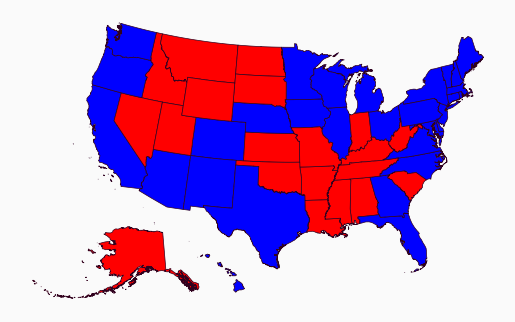

In [133]:
ax = states.plot(edgecolor=edge_color, color=create_state_colors(y_2023), linewidth=0.5)

plt.axis("off")
plt.show()